# Resources

4 Python Packages to Learn Causal Analysis: https://towardsdatascience.com/4-python-packages-to-learn-causal-analysis-9a8eaab9fdab

# Causalimpact

Causalimpact is a Python package for Causal Analysis to estimate the causal effect of the time series intervention. The analysis tries to see the difference between the treatment before and after the fact.

Causalimpact would analyze the response time series (e.g., clicks, drug effect, etc.) and a control time series (your response but in a more controlled environment) with the Bayesian structural time-series model. This model predicts the counterfactual (what happens if the intervention never happens), and then we could compare the result.

In [1]:
! pip install causalimpact

  Created wheel for cons: filename=cons-0.4.5-py3-none-any.whl size=9129 sha256=7dfe4569c881aa52d50970839769f6ea3c66228655bfee18a6722531d91249ce
  Stored in directory: c:\users\windows pc\appdata\local\pip\cache\wheels\df\1c\d4\98d11d61a5a6c5de77e96de4aa2568cba4b8a4379854728e20
  Created wheel for logical-unification: filename=logical_unification-0.4.5-py3-none-any.whl size=13782 sha256=0f7bcc20074bc6918b3c53659e6f5942368eb2c729622fa48b994485727a9d2d
  Stored in directory: c:\users\windows pc\appdata\local\pip\cache\wheels\f9\ec\f8\17a976d5963719c370a62cab7de82bd2719c660ccd91495898
  Created wheel for etuples: filename=etuples-0.3.8-py3-none-any.whl size=12644 sha256=2a5e51d81c4982b084865689580eefe8fc663ede970797ad9f9ce791d4149211
  Stored in directory: c:\users\windows pc\appdata\local\pip\cache\wheels\1c\8c\c2\706794a2b015baed544654916ae048e78517b1058a957297bf
  Created wheel for miniKanren: filename=miniKanren-1.0.3-py3-none-any.whl size=23939 sha256=fb823f91010cc0541a61a81e0a09ffbf

After finishing installing the package, let’s create simulated data. We would create an example dataset with 100 observations where there would be an intervention effect after timepoint 71.

In [2]:
import numpy as np
from statsmodels.tsa.arima_process import arma_generate_sample
from causalimpact import CausalImpact
np.random.seed(1)
x1 = arma_generate_sample(ar=[0.999], ma=[0.9], nsample=100) + 100
y = 1.2 * x1 + np.random.randn(100)
y[71:100] = y[71:100] + 10
data = pd.DataFrame(np.array([y, x1]).T, columns=["y","x1"])
pre_period = [0,69]
post_period = [71,99]

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<IPython.core.display.Javascript object>

Reviewing the data created

In [3]:
data

,y,x1
0,121.308920,101.463374
1,120.563149,99.448868
2,119.832495,99.524170
3,119.433612,99.033362
4,119.840664,100.779647
...,...,...
95,128.456173,100.069676
96,130.230586,99.690222
97,130.467414,100.039276
98,130.140680,99.441441


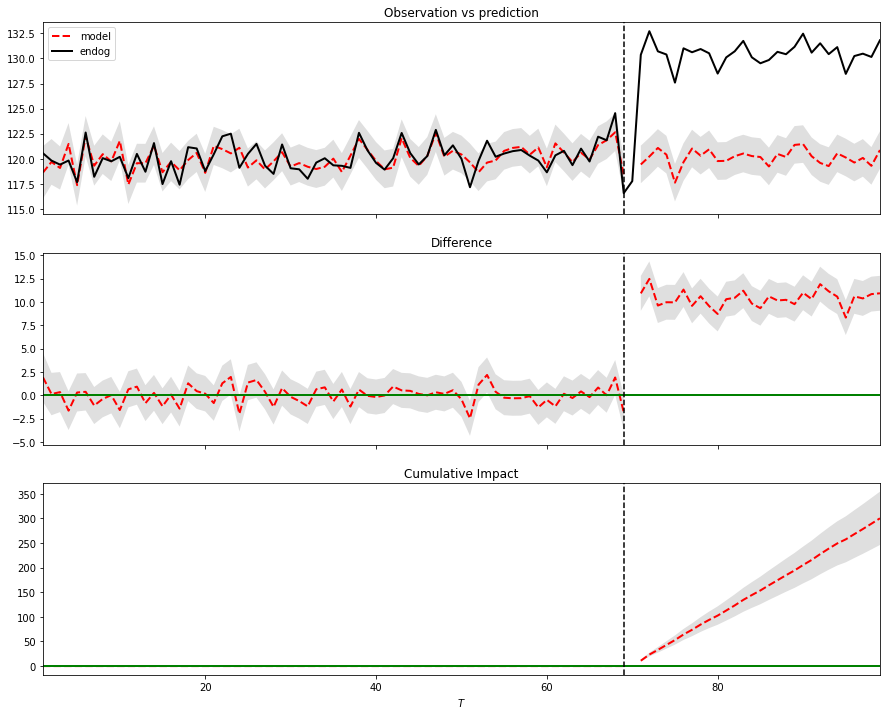

In [4]:
impact = CausalImpact(data, pre_period, post_period)
impact.run()
impact.plot()

The plot above gives us three sets of information. The top panel shows the actual data and a counterfactual prediction for the post-treatment period. The middle panel shows the difference between actual data and counterfactual predictions, which is the pointwise causal effect. The bottom panel is a plot of the cumulative effect of the intervention, where we accumulate the pointwise contributions from the middle panel.

If we want to gain information from each data point, we could use the following code.

In [9]:
impact.inferences
# type(impact.inferences)

,response,cum_response,point_pred,point_pred_lower,point_pred_upper,cum_pred,cum_pred_lower,cum_pred_upper,point_effect,point_effect_lower,point_effect_upper,cum_effect,cum_effect_lower,cum_effect_upper
0,121.308920,121.308920,121.983426,-2774.849177,3018.816029,121.983426,-2774.849177,3018.816029,-0.674506,2896.158097,-2897.507109,0.000000,0.000000,0.000000
1,120.563149,241.872070,118.645161,116.021451,121.268872,240.628587,-2658.827726,3140.084901,1.917988,4.541699,-0.705722,0.000000,0.000000,0.000000
2,119.832495,361.704565,119.703725,117.431525,121.975926,360.332313,-2541.396201,3262.060827,0.128770,2.400970,-2.143431,0.000000,0.000000,0.000000
3,119.433612,481.138177,119.097659,116.955408,121.239910,479.429972,-2424.440793,3383.300736,0.335954,2.478205,-1.806297,0.000000,0.000000,0.000000
4,119.840664,600.978841,121.490741,119.416515,123.564966,600.920712,-2305.024278,3506.865703,-1.650077,0.424149,-3.724302,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,128.456173,11789.191224,120.140554,118.272105,122.009002,11413.153750,8337.414859,14488.892641,8.315619,10.184067,6.447170,257.597248,304.308461,210.886035
96,130.230586,11919.421810,119.638806,117.770358,121.507255,11532.792556,8455.185216,14610.399895,10.591779,12.460228,8.723331,268.189028,316.768689,219.609366
97,130.467414,12049.889223,120.100357,118.231909,121.968806,11652.892913,8573.417125,14732.368701,10.367057,12.235505,8.498608,278.556085,329.004195,228.107975
98,130.140680,12180.029904,119.309845,117.441397,121.178294,11772.202759,8690.858522,14853.546995,10.830835,12.699284,8.962387,289.386920,341.703478,237.070361


Also, a summary result is acquired via the following code.

In [10]:
impact.summary()

                              Average     Cumulative
Actual                            130           3784
Predicted                         120           3484
95% CI                     [118, 122]   [3430, 3538]
                                                    
Absolute Effect                    10            300
95% CI                        [12, 8]     [354, 246]
                                                    
Relative Effect                  8.6%           8.6%
95% CI                  [10.2%, 7.1%]  [10.2%, 7.1%]
                                                    
P-value                          0.0%               
Prob. of Causal Effect         100.0%               


The summary allowed us to assess if the intervention happening had a causal effect or not. If you want a more detailed report, you could use the following code.

In [11]:
impact.summary(output = 'report')

During the post-intervention period, the response             variable had an average value of             approx. 130.
By contrast, in  the absence of an intervention, we would have expected an average response of 120. The 95% interval of
this counterfactual prediction is [118, 122]. Subtracting this prediction from the observed response yields an estimate
of the causal effect the intervention had on the response variable. This effect is 10 with a 95% interval of [12, 8].
For a discussion of the significance of this effect, see below.


 Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully
interpreted), the response variable had an overall value of 3784.  By contrast, had  the intervention not taken place,
we would have expected a sum of 3484. The 95% interval of this prediction is [3430, 3538]


 The above results are given in terms of absolute numbers. In relative terms, the response variable showed  an increase
of  8.6%

There is a set of diagnostic plots that will allow you to view the residuals and validate their normality

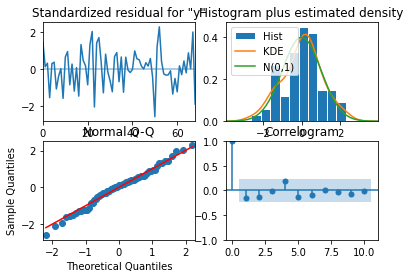

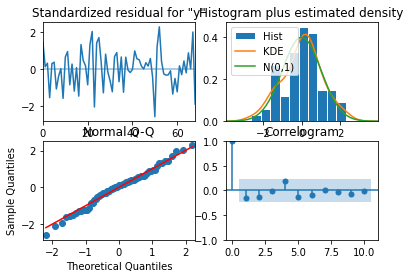

In [12]:
impact.results.results.plot_diagnostics()

Further documentation can be found here: https://nbviewer.org/github/jamalsenouci/causalimpact/blob/master/GettingStarted.ipynb